In [23]:
import pandas as pd

In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']

# reading the pima dataset

pima = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=1)

In [25]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi',
                'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  # Features
y = pima.label  # Target variable

In [27]:
X

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16)

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_predict = logreg.predict(X_test)

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[116,   9],
       [ 26,  41]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

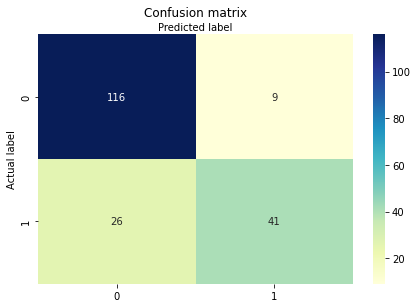

In [32]:
# Visualizing the confusion matrix using Heatmap
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


class_names = ["healthy", "sick"]  # name  of classes

fig, ax = plt.subplots()

tick_marks = [0, 1]
plt.xticks(tick_marks, class_names)

plt.yticks(tick_marks, class_names)


# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')


ax.xaxis.set_label_position("top")

plt.tight_layout()

plt.title('Confusion matrix')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

In [33]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_predict, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



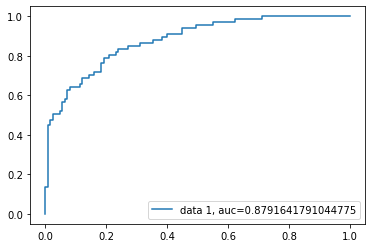

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()